# 간단한 크롤링 연습
https://news.v.daum.net/v/20210525000345840 주소에서 크롤링 연습을 해보겠습니다. 
해당 페이지를 chrome 으로 열고 개발자도구를 이용하면 크롤링하고자 하는 요소의 소스 부분을 쉽게 화인할 수 있습니다. 

***

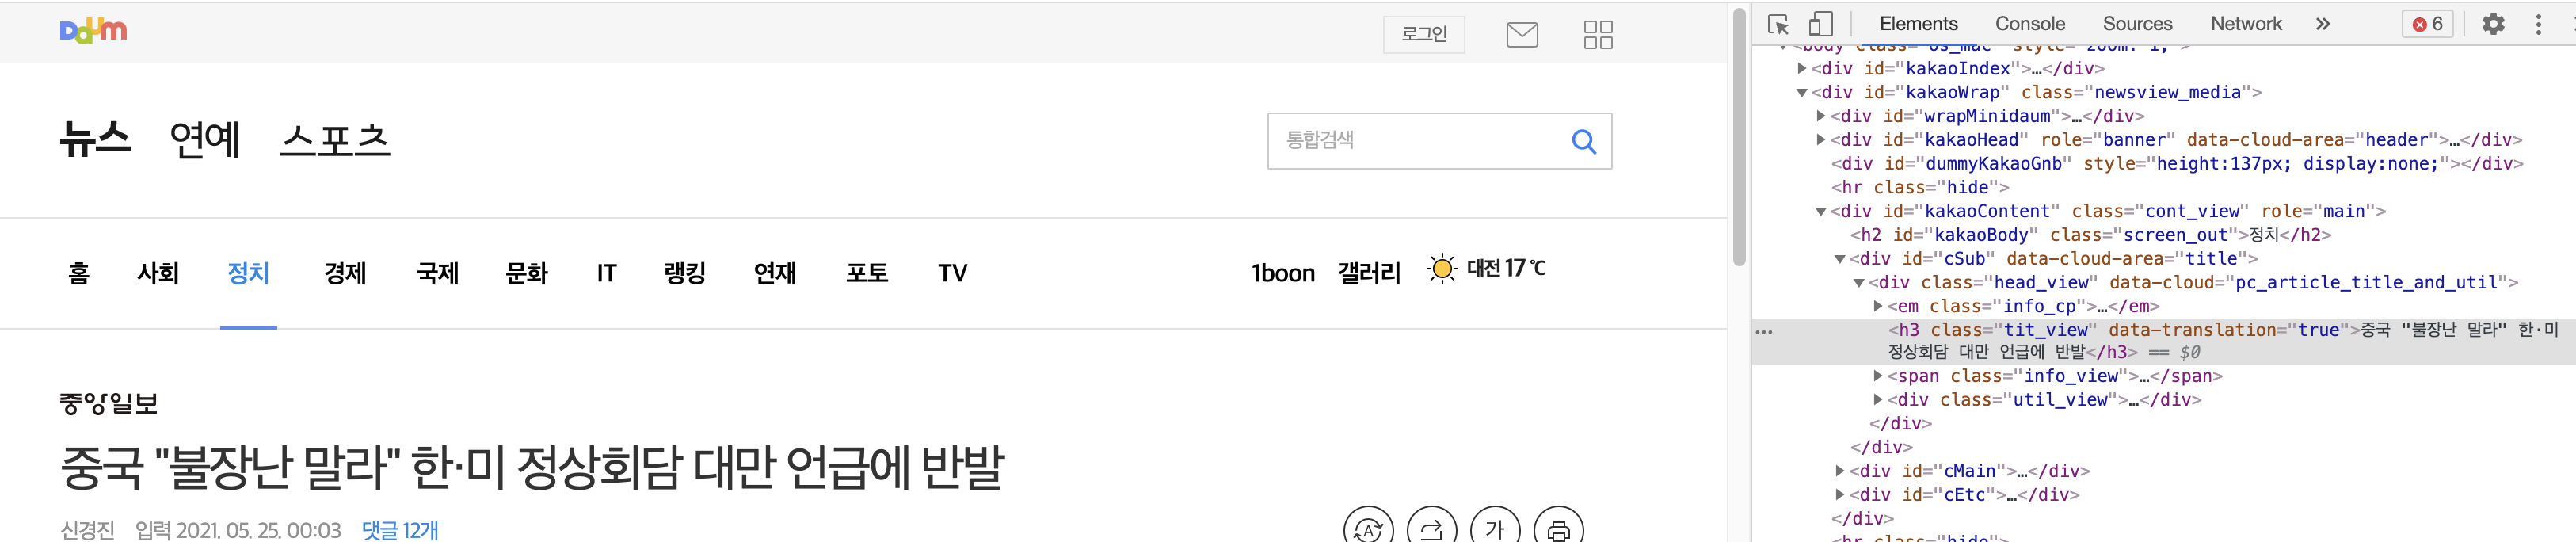

In [3]:
from IPython.display import Image
Image("image/news1.png")

***

위 기사에서 (중국 "불장난 말라" 한.미 정상회당 대만 언급에 반발) 이란 부분을 빼내어보겠습니다.
해당 부분의 html 소스를 보면 아래와 같습니다.

```
<h3 class="tit_view" data-translation="true">중국 "불장난 말라" 한·미 정상회담 대만 언급에 반발</h3>
```

In [21]:
import requests
from bs4 import BeautifulSoup
res = requests.get("https://news.v.daum.net/v/20210525000345840")
soup = BeautifulSoup(res.content,'html.parser')
mydata = soup.find('h3')
print(mydata.get_text())

중국 "불장난 말라" 한·미 정상회담 대만 언급에 반발


원하는 결과를 얻었지만, 뭔가 찜찜함이 있습니다. 위에서 보면 `soup.find('h3')` 코드를 통해서 웹페이지 소스에서 `<h3>` 태그를 찾아서 해당 태그의 데이터를 얻어 왔지만, 한 페이지에 `<h3>` 라는 태그는 여러번 있을 수 있습니다. 위와 같은 방법은 정확하지 않은 방법이겠죠. <br>
   
이런 경우에는 좀 더 정밀한 방법이 필요합니다. 위의 코드를 보면 `<h3 class="tit_view" .... </h3>` 라는 부분이 있는데 다 아시겠지만 `class=..` 부분은 해당 엘리먼트에 적용할 스타일을 명시해 놓은 것입니다. 그럼 이 스타일을 이용해서 크롤링을 해보는 방법에 대해서 살펴보겠습니다. 

In [20]:
import requests
from bs4 import BeautifulSoup
res = requests.get("https://news.v.daum.net/v/20210525000345840")
soup = BeautifulSoup(res.content,'html.parser')
mydata = soup.find('h3',class_='tit_view') # soup.find('h3','tit_view') 로 해도 됨.
print(mydata.get_text())

중국 "불장난 말라" 한·미 정상회담 대만 언급에 반발
